# Run tests on Code in evaluation.py file

In [1]:
import os
import sys
path = os.path.dirname(os.path.abspath(""))+"/"

In [2]:
sys.path.append(path)
from CellAnalysis.evaluation import *
from skimage import io
import matplotlib.pyplot as plt
from tqdm import tqdm
import time

### Import segmentation masks from model and proofread data

In [3]:
# file root
file_root = path + 'x-ray-boxes/'

#volume_JBW = io.imread(file_root + 'box6_vol.tif')
seg_JBW = io.imread(file_root + 'box6_seg.tif')
seg_JBW_stardist = io.imread(file_root + 'box6_stardist.tif')

# volume_PT = io.imread('box2_vol.tif')
seg_PT = io.imread(file_root + 'box2_seg.tif')
seg_PT_stardist = io.imread(file_root + 'box2_stardist.tif')

# volume_MM = io.imread('box3_vol.tif')
seg_MM = io.imread(file_root + 'box3_seg.tif')
seg_MM_stardist = io.imread(file_root + 'box3_stardist.tif')

# volume_DL = io.imread('box4_vol.tif')
seg_DL = io.imread(file_root + 'box4_seg.tif')
seg_DL_stardist = io.imread(file_root + 'box4_stardist.tif')

# volume_RM = io.imread('box5_vol.tif')
seg_RM = io.imread(file_root + 'box5_seg.tif')
seg_RM_stardist = io.imread(file_root + 'box5_stardist.tif')

### Test metric function on example box

In [4]:
%%time
dist_thresh = 0.5
min_adc, mean_adc, f_score, precision, recall, tp, fp, fn = average_distance_between_centroids(seg_JBW, seg_JBW_stardist, dist_thresh = dist_thresh, all_stats=True)

print('Average Distance between Centroids: \t \t{:.4f}'.format(min_adc))
print('Mean Average Distance between Centroids: \t{:.4f}'.format(mean_adc))
print('f_score: \t \t \t \t \t{:.4f}'.format(f_score))

Shape of ground truth centroid vector: 	 	 (81, 3)
Shape of model prediction centroid vector: 	 (97, 3)
Calculating distance matrix...
Shape of calculated distance matrix: 	 	 (81, 97)
Average Distance between Centroids: 	 	1.6113
Mean Average Distance between Centroids: 	36.1259
f_score: 	 	 	 	 	0.9573
CPU times: user 87.7 ms, sys: 10.6 ms, total: 98.4 ms
Wall time: 124 ms


### Test that distance evalutes to 0.0 if volumes are equal

In [5]:
%%time
dist_thresh = 0.5
min_adc, mean_adc, f_score, precision, recall, tp, fp, fn = average_distance_between_centroids(seg_JBW, seg_JBW, dist_thresh = dist_thresh, all_stats=True)

print('Average Distance between Centroids: \t \t{:.4f}'.format(min_adc))
print('Mean Average Distance between Centroids: \t{:.4f}'.format(mean_adc))
print('f_score: \t \t \t \t \t{:.4f}'.format(f_score))

Shape of ground truth centroid vector: 	 	 (81, 3)
Shape of model prediction centroid vector: 	 (81, 3)
Calculating distance matrix...
Shape of calculated distance matrix: 	 	 (81, 81)
Average Distance between Centroids: 	 	0.0000
Mean Average Distance between Centroids: 	35.6776
f_score: 	 	 	 	 	2.5000
CPU times: user 66.2 ms, sys: 3.4 ms, total: 69.6 ms
Wall time: 75.2 ms


### Runtime analysis for bigger volumes

In [6]:
import time
dist_thresh = 0.5
start = time.time()
min_adc, mean_adc, f_score, precision, recall, tp, fp, fn = average_distance_between_centroids(seg_JBW, seg_JBW_stardist, dist_thresh = dist_thresh, all_stats=True)
end = time.time()
print('Average Distance between Centroids: \t \t{:.4f}'.format(min_adc))
print('Mean Average Distance between Centroids: \t{:.4f}'.format(mean_adc))
print('f_score: \t \t \t \t \t{:.4f}'.format(f_score))
print ("\nTime elapsed for volume of shape {}: {:.6f} \n".format(seg_JBW.shape, end - start))

print("-------------------------------------------------------\n")
temp_gt = np.concatenate((np.concatenate((seg_JBW, seg_PT), axis=0),np.concatenate((seg_MM, seg_DL), axis=0)), axis=1)
big_vol_gt = np.concatenate((temp_gt, temp_gt), axis =2)
print("Shape of enlarged box of ground truth data: \t{}".format(big_vol_gt.shape))
temp_pred = np.concatenate((np.concatenate((seg_JBW_stardist, seg_PT_stardist), axis=0),np.concatenate((seg_MM_stardist, seg_DL_stardist), axis=0)), axis=1)
big_vol_pred = np.concatenate((temp_pred, temp_pred), axis =2)
print("Shape of enlarged box of prediction data: \t{}".format(big_vol_pred.shape))

start = time.time()
min_adc, mean_adc, f_score, precision, recall, tp, fp, fn = average_distance_between_centroids(big_vol_gt, big_vol_pred, dist_thresh = dist_thresh, all_stats=True)
end = time.time()
print('Average Distance between Centroids: \t \t{:.4f}'.format(min_adc))
print('Mean Average Distance between Centroids: \t{:.4f}'.format(mean_adc))
print('f_score: \t \t \t \t \t{:.4f}'.format(f_score))
print ("\nTime elapsed for volume of shape {}: {:.6f} \n".format(big_vol_gt.shape, end - start))

Shape of ground truth centroid vector: 	 	 (81, 3)
Shape of model prediction centroid vector: 	 (97, 3)
Calculating distance matrix...
Shape of calculated distance matrix: 	 	 (81, 97)
Average Distance between Centroids: 	 	1.6113
Mean Average Distance between Centroids: 	36.1259
f_score: 	 	 	 	 	0.9573

Time elapsed for volume of shape (50, 50, 50): 0.065895 

-------------------------------------------------------

Shape of enlarged box of ground truth data: 	(100, 100, 100)
Shape of enlarged box of prediction data: 	(100, 100, 100)
Shape of ground truth centroid vector: 	 	 (100, 3)
Shape of model prediction centroid vector: 	 (210, 3)
Calculating distance matrix...
Shape of calculated distance matrix: 	 	 (100, 210)
Average Distance between Centroids: 	 	9.4474
Mean Average Distance between Centroids: 	40.6958
f_score: 	 	 	 	 	0.6965

Time elapsed for volume of shape (100, 100, 100): 0.745293 



### Runtime Analysis of functions in evaluation.py

In the following we test the runtimes of the functions "distance_matrix" and "average_distance_between_centroids" from the file "evaluation.py". We increase the vector size of the two centroid vectors a,b € R^(N,3) by 200 samples each run up to a total size at the last run of N=10000.

In [36]:
import time

time_dist = {}
time_metric = {}
min_adc_s = {}

for i in tqdm(range(20, 12000, 200)):
    a = np.random.uniform(0.0, 1000, size=(i, 3))
    b = np.random.uniform(0.0, 1000, size=(i, 3))
    start_dist = time.time()
    distances = distance_matrix(a, b)
    end_dist = time.time()
    time_dist[i] = end_dist - start_dist 
    
    start_metric = time.time()
    min_gt = np.min(distances, axis=1)
    min_pred = np.min(distances, axis=0)
    
    min_adpc = min_gt.sum() / min_gt.shape[0]
    min_adgc = min_pred.sum() / min_pred.shape[0]
    
    min_adc = (min_adgc + min_adpc) / 2
    end_metric = time.time()
    
    time_metric[i] = end_metric - start_metric
    min_adc_s[i] = min_adc
    
    

100%|██████████| 60/60 [19:15<00:00, 19.26s/it]


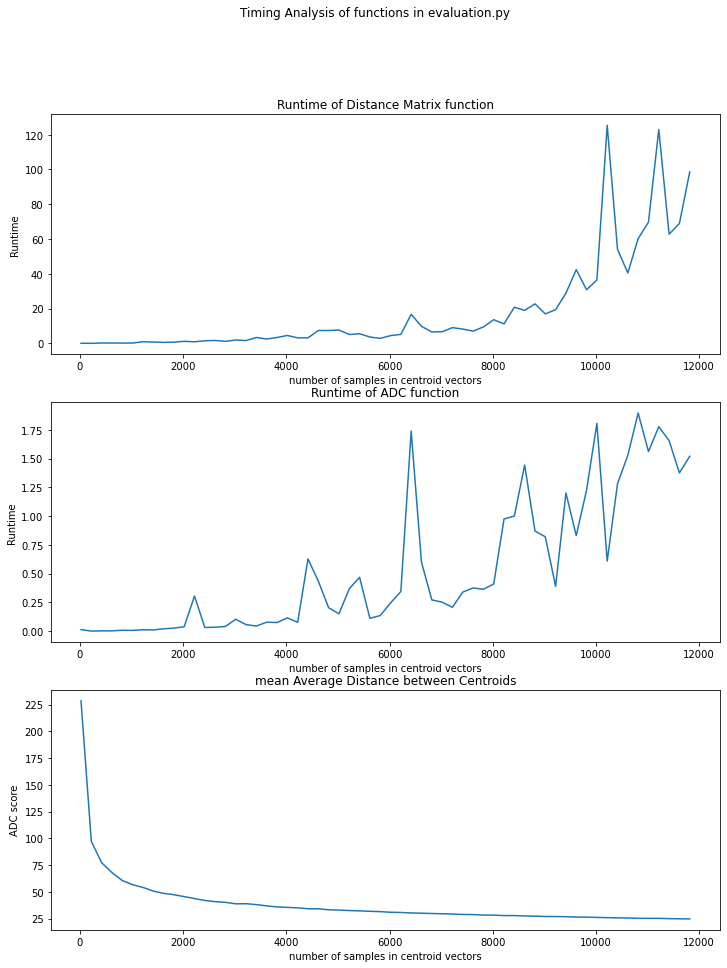

In [37]:
x_samples = time_metric.keys()
y_time_distances = time_dist.values()
y_time_metrics = time_metric.values()
y_adcs = min_adc_s.values()

fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(12,15))
fig.suptitle('Timing Analysis of functions in evaluation.py')
ax1.set_title('Runtime of Distance Matrix function')
ax2.set_title('Runtime of ADC function')
ax3.set_title('mean Average Distance between Centroids')

ax1.set(xlabel = 'number of samples in centroid vectors', ylabel = 'Runtime')
ax2.set(xlabel = 'number of samples in centroid vectors', ylabel = 'Runtime')
ax3.set(xlabel = 'number of samples in centroid vectors', ylabel = 'ADC score')
ax1.plot(x_samples, y_time_distances)
ax2.plot(x_samples, y_time_metrics)
ax3.plot(x_samples, y_adcs)

quadratic funcion coefficients:
[-8.45986685e-03  1.23383073e-06  1.07275749e+01]
Covariance of coefficients:
[[ 4.55206359e-06 -3.59849487e-10 -1.00197930e-02]
 [-3.59849487e-10  3.03926930e-14  7.00543471e-07]
 [-1.00197930e-02  7.00543471e-07  2.98578374e+01]]


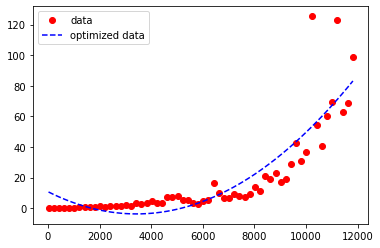

In [48]:
import numpy as np 
from scipy.optimize import curve_fit 

x_samples = np.fromiter(x_samples, dtype=float)
y_time_distances = np.fromiter(y_time_distances, dtype=float)
y_time_metrics = np.fromiter(y_time_metrics, dtype=float)

def quadratic(x, a, b, c): 
    return a * x + b * x**2 +c
  
param, param_cov = curve_fit(quadratic, x_samples, y_time_distances) 
  
print("quadratic funcion coefficients:") 
print(param) 
print("Covariance of coefficients:") 
print(param_cov) 
  
ans = (param[0]*x_samples + param[1] * x_samples**2 + param[2])
  
plt.plot(x_samples, y_time_distances, 'o', color ='red', label ="data") 
plt.plot(x_samples, ans, '--', color ='blue', label ="optimized data") 
plt.legend() 
plt.show() 

In [49]:
params_dist = np.polyfit(x_samples, y_time_distances, 4)
params_metric = np.polyfit(x_samples, y_time_metrics, 4)
#print(params_dist)

Polynomial of order 4 for distance matrix function: 

            4             3             2
3.016e-15 x + 1.067e-10 x - 1.389e-06 x + 0.005022 x - 2.687






Polynomial of order 4 for ADC metric function: 

             4             3             2
-1.415e-16 x + 3.951e-12 x - 2.131e-08 x + 8.285e-05 x - 0.03963


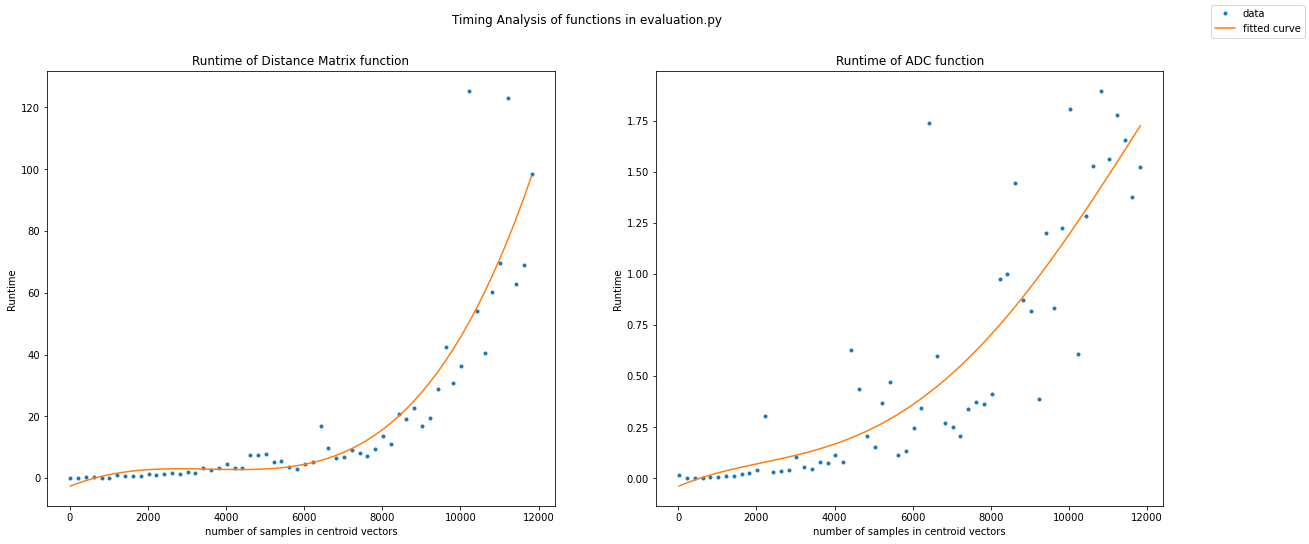

In [71]:
poly_dist = np.poly1d(params_dist)
poly_metrics = np.poly1d(params_metric)
print("Polynomial of order 4 for distance matrix function: \n\n", poly_dist)
print("\n\n\n\n\n\nPolynomial of order 4 for ADC metric function: \n\n", poly_metrics)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
fig.suptitle('Timing Analysis of functions in evaluation.py')
ax1.set_title('Runtime of Distance Matrix function')
ax2.set_title('Runtime of ADC function')

ax1.set(xlabel = 'number of samples in centroid vectors', ylabel = 'Runtime')
ax2.set(xlabel = 'number of samples in centroid vectors', ylabel = 'Runtime')

ax1.plot(x_samples, y_time_distances, '.', label='data') 
ax1.plot(x_samples, poly_dist(x_samples), '-', label='fitted curve')
ax2.plot(x_samples, y_time_metrics, '.', label='data')
ax2.plot(x_samples, poly_metrics(x_samples), '-', label='fitted curve')

handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')
plt.show()

In [7]:
bigger_vol_gt = np.concatenate([big_vol_gt]*64).reshape((400, 400, -1))
print(bigger_vol_gt.shape)
bigger_vol_pred = np.concatenate([big_vol_pred]*64).reshape((400, 400, -1))
print(bigger_vol_pred.shape)

(400, 400, 400)
(400, 400, 400)


In [74]:
%%time
dist_thresh = 0.5
min_adc, mean_adc, f_score, precision, recall, tp, fp, fn = average_distance_between_centroids(bigger_vol_gt, bigger_vol_pred, dist_thresh = dist_thresh, all_stats=True)

print('Average Distance between Centroids: \t \t{:.4f}'.format(min_adc))
print('Mean Average Distance between Centroids: \t{:.4f}'.format(mean_adc))
print('f_score: \t \t \t \t \t{:.4f}'.format(f_score))

Shape of ground truth centroid vector: 	 	 (100, 3)
Shape of model prediction centroid vector: 	 (210, 3)
Calculating distance matrix...
Shape of calculated distance matrix: 	 	 (100, 210)
Average Distance between Centroids: 	 	5.3918
Mean Average Distance between Centroids: 	28.8271
f_score: 	 	 	 	 	0.6869
CPU times: user 3min 4s, sys: 28.4 s, total: 3min 33s
Wall time: 3min 54s
